In [1]:
pip install pandas numpy matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Preprocessing: Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, :-1])


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  Cluster  
0       0        1  
1       0        1  
2       0        1  
3       0        1  
4       0        1  


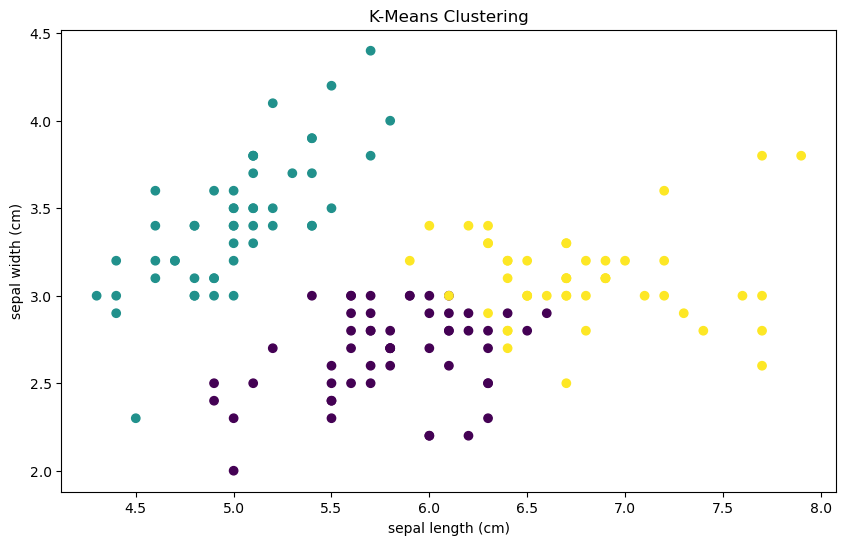

In [3]:
from sklearn.cluster import KMeans

# Define the model
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the results
print(df.head())

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Load dataset
X = df.iloc[:, :-2]  # Features
y = df['target']     # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define and fit the model
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


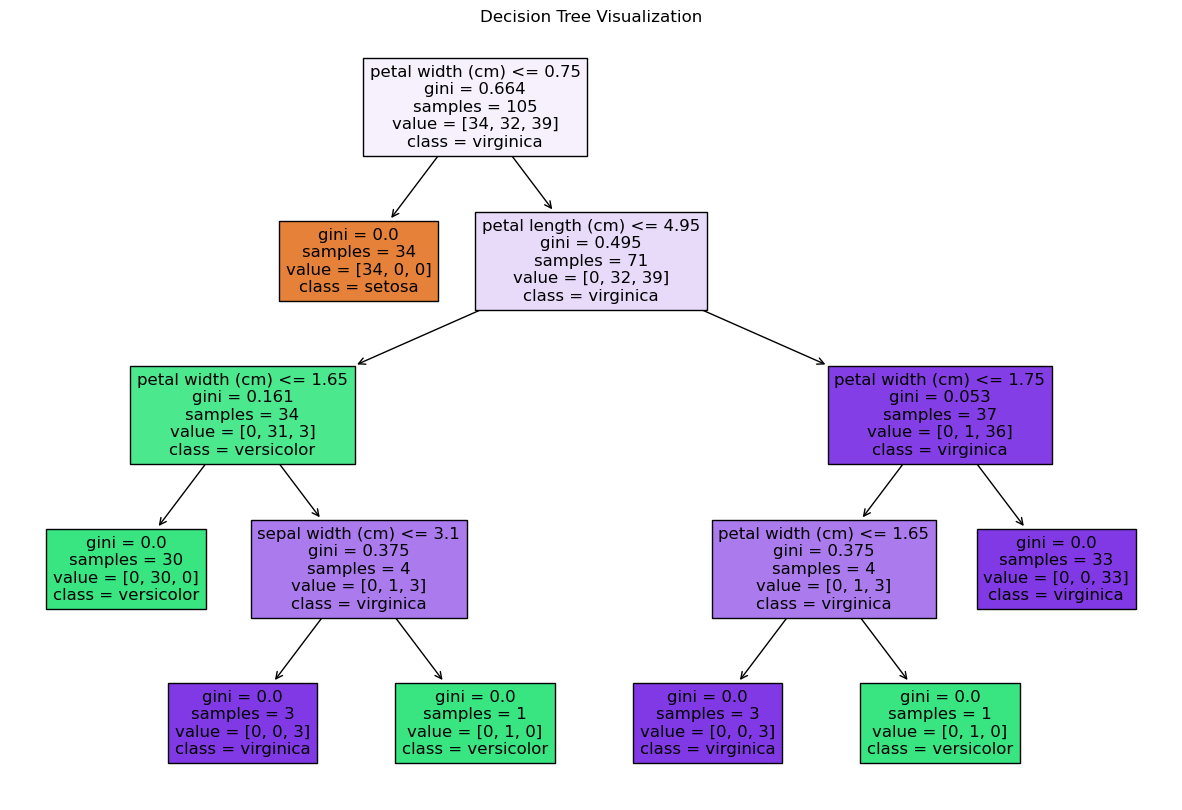

In [6]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title('Decision Tree Visualization')
plt.show()
